<a href="https://colab.research.google.com/github/noran97/NTI-AI-projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import *
from keras.layers import *
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5515 - loss: 1.6529 - val_accuracy: 0.8691 - val_loss: 0.5815
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8684 - loss: 0.5437 - val_accuracy: 0.8985 - val_loss: 0.3907
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8934 - loss: 0.4028 - val_accuracy: 0.9107 - val_loss: 0.3341
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9031 - loss: 0.3478 - val_accuracy: 0.9161 - val_loss: 0.3040
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9123 - loss: 0.3140 - val_accuracy: 0.9217 - val_loss: 0.2813
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9165 - loss: 0.2982 - val_accuracy: 0.9246 - val_loss: 0.2680
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9218 - loss: 0.2762 - val_accuracy: 0.9282 - val_loss: 0.2540
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9271 - loss: 0.2564 - val_accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9520


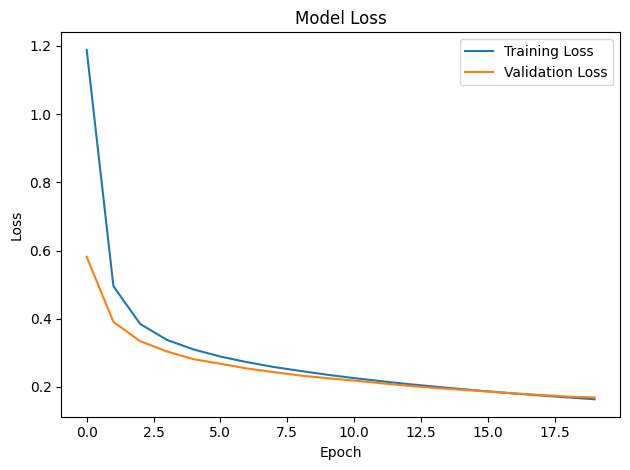

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='tanh', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.1128 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.1110 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.1145 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.1122 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.1119 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.1106 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.1127 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.1136 - loss: 2.3011 - 

In [ ]:

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

In [ ]:
import numpy as np
train_filter = np.where((y_train == 1) | (y_train == 7))[0]
test_filter = np.where((y_test == 1) | (y_test == 7))[0]
x_train = x_train[train_filter]
y_train = y_train[train_filter]
x_test = x_test[test_filter]
y_test = y_test[test_filter]
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

In [ ]:
y_train = (y_train == 7).astype(int)
y_test = (y_test == 7).astype(int)

In [ ]:
# Create the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9465 - loss: 0.1498 - val_accuracy: 0.9954 - val_loss: 0.0155
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9966 - loss: 0.0126 - val_accuracy: 0.9958 - val_loss: 0.0123
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9967 - loss: 0.0115 - val_accuracy: 0.9962 - val_loss: 0.0089
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9954 - val_loss: 0.0118
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9962 - val_loss: 0.0107
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9962 - val_loss: 0.0091
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 0.9977 - val_loss: 0.0099
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9962 - val_lo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9954


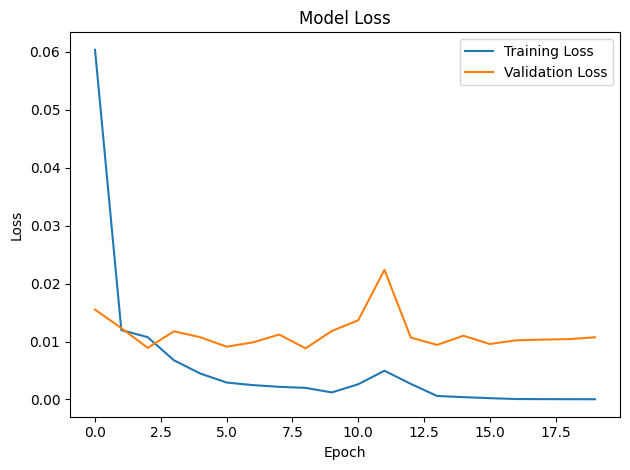

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent_space = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(latent_space)
decoded = Dense(128, activation='relu')(decoded)
output_img = Dense(784, activation='sigmoid')(decoded)

In [ ]:
from tensorflow.keras.models import Model
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the autoencoder
history=autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0843 - val_loss: 0.0838
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0842 - val_loss: 0.0839
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0841 - val_loss: 0.0836
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0841 - val_loss: 0.0837
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0839 - val_loss: 0.0836
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0839 - val_loss: 0.0836
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0838 - val_loss: 0.0833
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0836 - val_loss: 0.0832
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0837 - val_loss: 0.0829
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0834 - val_loss: 0.0830
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0833 - val_loss: 0.0831
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

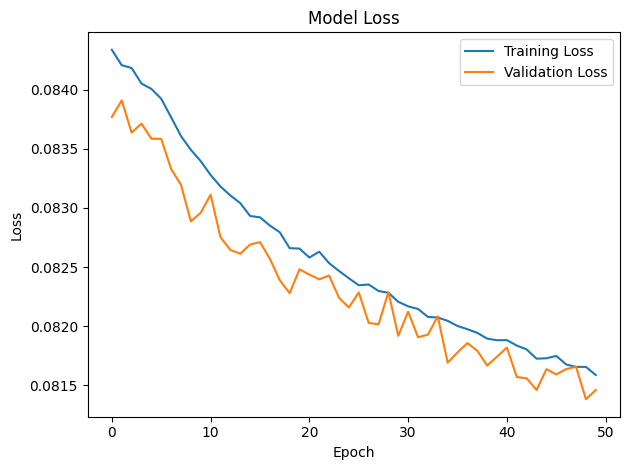

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

input_layer = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
# Decoder
encoded = Dense(512, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
history=autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.2693 - val_loss: 0.1088
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1042 - val_loss: 0.0906
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0899 - val_loss: 0.0843
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.0842 - val_loss: 0.0808
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0813 - val_loss: 0.0788
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0793 - val_loss: 0.0777
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0780 - val_loss: 0.0767
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 0.0771 - val_loss: 0.0759
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0763 - val_loss: 0.0755
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 0.0755 - val_loss: 0.0749
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0751 - val_loss: 0.0747
Epoch 12/20
235/235 ━━━━━━━━━━━━

In [ ]:
import numpy as np
random_index = np.random.randint(0, x_test.shape[0])
noisy_image = x_test[random_index]

noise_factor = 0.2
noisy_image = noisy_image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=noisy_image.shape)
noisy_image = np.clip(noisy_image, 0., 1.)


In [ ]:
# Reshape the noisy image to match the input shape of the autoencoder
noisy_image_reshaped = noisy_image.reshape(1, 28 * 28)

# Denoise the noisy image
denoised_image = autoencoder.predict(noisy_image_reshaped)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


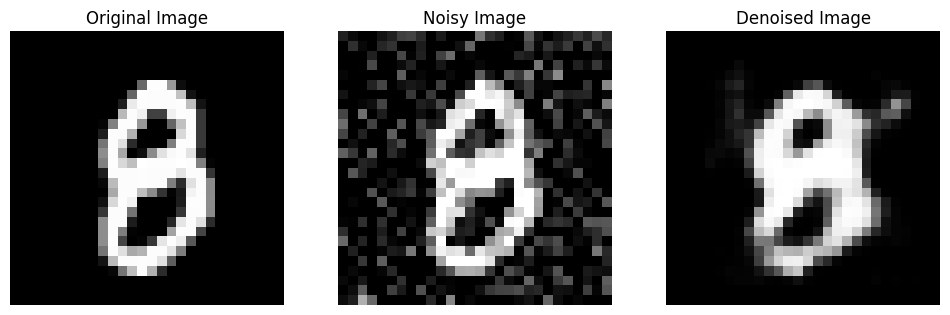

In [ ]:
import matplotlib.pyplot as plt
# Reshape images for display
original_image = x_test[random_index].reshape(28, 28)
noisy_image_display = noisy_image.reshape(28, 28)
denoised_image_display = denoised_image.reshape(28, 28)

# Display the images
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy image
plt.subplot(1, 3, 2)
plt.imshow(noisy_image_display, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Denoised image
plt.subplot(1, 3, 3)
plt.imshow(denoised_image_display, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()
